<a href="https://colab.research.google.com/github/Amalkhoja/MASAR_H.W3/blob/main/Data_Cleaning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset called Student Exam Performance Prediction
 its contained 4 features.
The source:(https://kaggle.com/datasets/mrsimple07/student-exam-performance-prediction?select=student_exam_data.csv)

DataSet Description:
Features:
1- **Study Hours**(numeric): Represents the number of hours a student spent studying for the upcoming exam.
2- **Previous Exam Score** (numeric): Indicates the student's score in the previous exam.

3- **Pass/Fail** (binary): The target variable, where 1 represents a pass and 0 represents a fail in the current exam.




#1-Data cleaning:


In [6]:
url ='/content/student_exam_data.csv'
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Read data from CSV file
data = pd.read_csv(url)
data

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [9]:
#Explore the data
data.head(4)

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [12]:
#The column
data.columns

Index(['Study Hours', 'Previous Exam Score', 'Pass/Fail'], dtype='object')

In [13]:
#Check the null (missing values)
data.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [14]:
#Check for duplicate rows
data.duplicated().sum()

0

In [17]:
#Check for outliers
data.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [18]:
# Check for inconsistencies
print(data.value_counts())

Study Hours  Previous Exam Score  Pass/Fail
1.045554     55.278439            0            1
6.928243     52.594336            0            1
7.263768     71.130283            1            1
7.261738     86.254732            1            1
7.227057     75.738324            1            1
                                              ..
3.862031     62.228326            0            1
3.852298     60.094337            0            1
3.829204     50.620629            0            1
3.805400     46.813456            0            1
9.936683     55.735843            0            1
Length: 500, dtype: int64


##Correlation Matrix

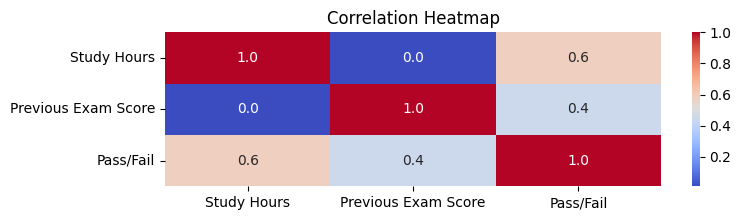

In [22]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(8, 2))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

## 2- Data Processing

In [23]:
#Check data types before Processing
data.dtypes

Study Hours            float64
Previous Exam Score    float64
Pass/Fail                int64
dtype: object

##Normalization

In [24]:
# prompt: Normalization

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(data[['Study Hours', 'Previous Exam Score']])

# Transform the data
data[['Study Hours', 'Previous Exam Score']] = scaler.transform(data[['Study Hours', 'Previous Exam Score']])

# Print the transformed data
data.head()


,Study Hours,Previous Exam Score,Pass/Fail
0,0.374003,0.696955,0
1,0.957232,0.534089,1
2,0.735834,0.306401,0
3,0.600865,0.813159,1
4,0.152806,0.683458,0


In [25]:
data.describe() #after normalization

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,0.499543,0.479677,0.368000
std,0.302346,0.286903,0.482744
min,0.000000,0.000000,0.000000
25%,0.239111,0.225576,0.000000
50%,0.514324,0.469497,0.000000
75%,0.760260,0.725269,1.000000
max,1.000000,1.000000,1.000000


In [26]:
data.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,0.374003,0.696955,0
1,0.957232,0.534089,1
2,0.735834,0.306401,0
3,0.600865,0.813159,1
4,0.152806,0.683458,0


##Save the cleaned dataset

In [29]:
# Save the cleaned dataset to the new CSV file.
data.to_csv('cleaned_2019WorldHappiness.csv', index=False)

#3- Data Visualization

In [30]:
url = '/content/student_exam_data.csv'
df = pd.read_csv(url)
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


from matplotlib import pyplot as plt
_df_0['Study Hours'].plot(kind='hist', bins=20, title='Study Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Previous Exam Score'].plot(kind='hist', bins=20, title='Previous Exam Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pass/Fail'].plot(kind='hist', bins=20, title='Pass/Fail')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Study Hours', y='Previous Exam Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Previous Exam Score', y='Pass/Fail', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Study Hours'].plot(kind='line', figsize=(8, 4), title='Study Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Previous Exam Score'].plot(kind='line', figsize=(8, 4), title='Previous Exam Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Pass/Fail'].plot(kind='line', figsize=(8, 4), title='Pass/Fail')
plt.gca().spines[['top', 'right']].set_visible(False)

##Boxplot

In [31]:
df.dtypes

Study Hours            float64
Previous Exam Score    float64
Pass/Fail                int64
dtype: object

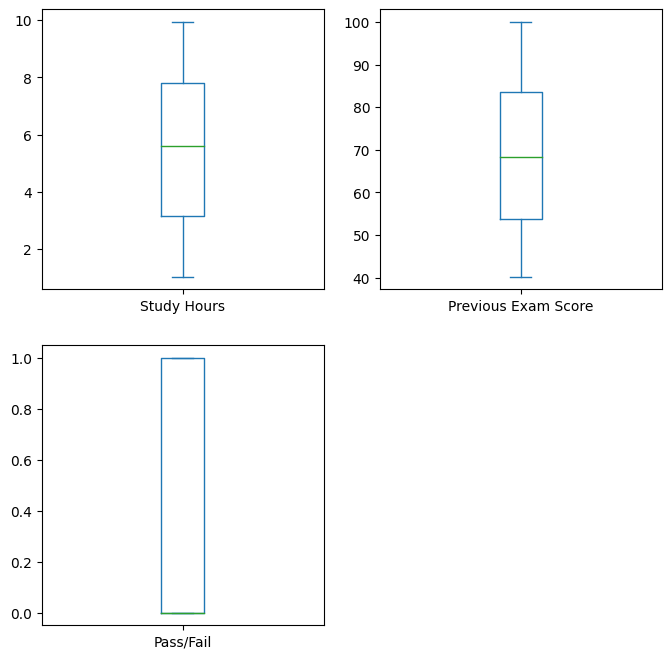

In [33]:
# prompt: boxplot

df.plot(kind='box', subplots=True, layout=(2,2), figsize=(8,8))
plt.show()


##Histogram

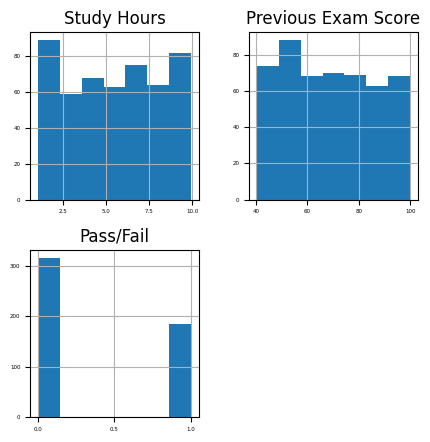

In [34]:
# prompt: histogram

df.hist(figsize=(5, 5), bins=7, xlabelsize=4, ylabelsize=4)
plt.show()


##Scatterplot

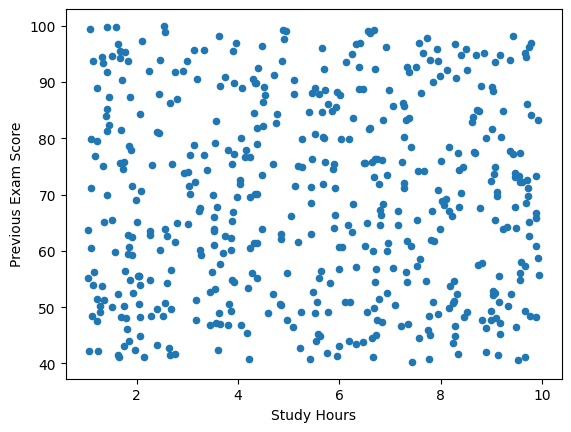

In [35]:
# prompt: Scatterplot

df.plot.scatter(x='Study Hours', y='Previous Exam Score')
plt.show()
